In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import graphviz
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
import sys

# We call the csv data
df = pd.read_csv('../data/raw/winequalityN.csv')
# We fill the NaN numerical values with 0
df.fillna(df.select_dtypes(include='number').mean(), inplace=True)

# White wine
dfW = df[df['type'] == 'white'].drop('type',axis =1)


top_Features = ['alcohol', 'volatile acidity', 'free sulfur dioxide']
# Y is our target
y = dfW['quality']
X_drop = dfW.drop('quality', axis=1)

# We split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_drop, y, test_size=0.2, random_state=42)

# We call our Class method (Decision Tree) and fit it
parameter = {
    'criterion': ['entropy', 'gini'],
    'splitter': ['best', 'random'],
    'max_depth': [5, 8, 10, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt', 'log2', None] 
}
Decision = DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(Decision,param_grid = parameter,cv = 5)
cv.fit(X_train,y_train)


print("Best parameters found: ", cv.best_params_)
best_model = cv.best_estimator_
print("Best model: ", best_model)

Best parameters found:  {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best model:  DecisionTreeClassifier(max_depth=10)


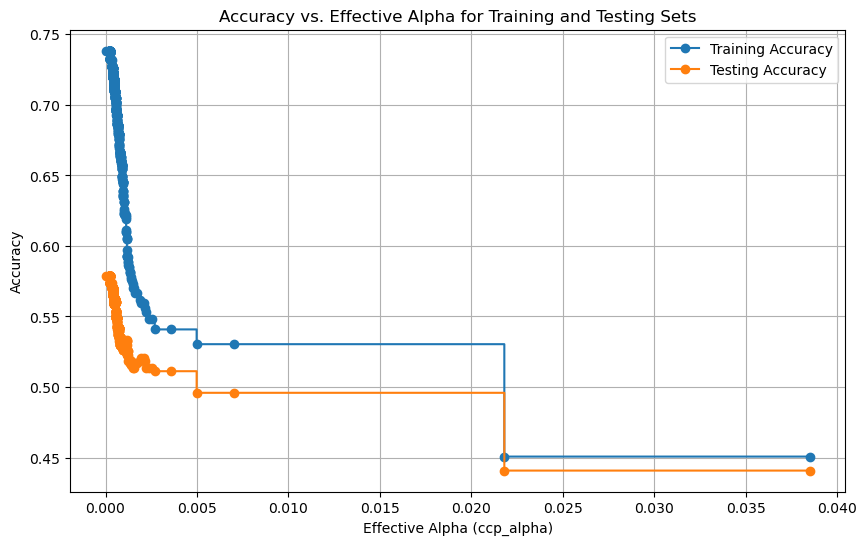

Optimal ccp_alpha: 0.0
Pruned Tree Accuracy: 0.5785714285714286

Pruned Tree Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.45      0.36      0.40        25
           5       0.61      0.63      0.62       291
           6       0.58      0.65      0.61       432
           7       0.56      0.44      0.49       192
           8       0.45      0.26      0.33        35

    accuracy                           0.58       980
   macro avg       0.44      0.39      0.41       980
weighted avg       0.57      0.58      0.57       980



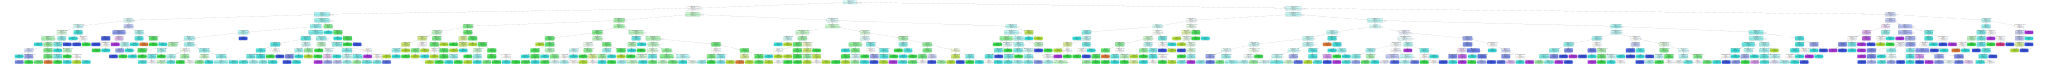

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import graphviz
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# We call the csv data
df = pd.read_csv('../data/raw/winequalityN.csv')
# We fill the NaN numerical values with 0
df.fillna(df.select_dtypes(include='number').mean(), inplace=True)

# White wine
dfW = df[df['type'] == 'white'].drop('type',axis =1)


top_Features = ['alcohol', 'volatile acidity', 'free sulfur dioxide','citric acid']

# Y is our target
y = dfW['quality']
X_drop = dfW.drop('quality', axis=1)

X_reduced = X_drop[top_Features]


# We split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_drop, y, test_size=0.2, random_state=42)


#grab the path total leaf impurities and then grab the alphas
path = DecisionTreeClassifier(random_state=42).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clf_list = []


for ccp_alpha in ccp_alphas:
    Decision = DecisionTreeClassifier(max_depth=10,min_samples_leaf=1,min_samples_split=2 ,ccp_alpha = ccp_alpha, random_state=42)
    Decision.fit(X_train,y_train)
    clf_list.append(Decision)
    


train_scores = [clf.score(X_train, y_train) for clf in clf_list]
test_scores = [clf.score(X_test, y_test) for clf in clf_list]


plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label='Training Accuracy', drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label='Testing Accuracy', drawstyle="steps-post")
plt.xlabel("Effective Alpha (ccp_alpha)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Effective Alpha for Training and Testing Sets")
plt.legend()
plt.grid(True)
plt.show()

optimal_index = test_scores.index(max(test_scores))
optimal_alpha = ccp_alphas[optimal_index]
print(f"Optimal ccp_alpha: {optimal_alpha}")


pruned_tree = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    ccp_alpha=optimal_alpha,
    random_state=42
)
pruned_tree.fit(X_train, y_train)

y_pred_pruned = pruned_tree.predict(X_test)

# Accuracy
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
print("Pruned Tree Accuracy:", accuracy_pruned)

# Classification Report
print("\nPruned Tree Classification Report:\n", classification_report(y_test, y_pred_pruned))


data_graph = tree.export_graphviz(
    pruned_tree, 
    out_file=None, 
    feature_names=X_drop.columns,  
    class_names=[str(i) for i in sorted(y.unique())],  
    filled=True, 
    rounded=True,  
    special_characters=True,
    precision=2  
)

# Generate the Graphviz visualization
graph = graphviz.Source(data_graph)
graph

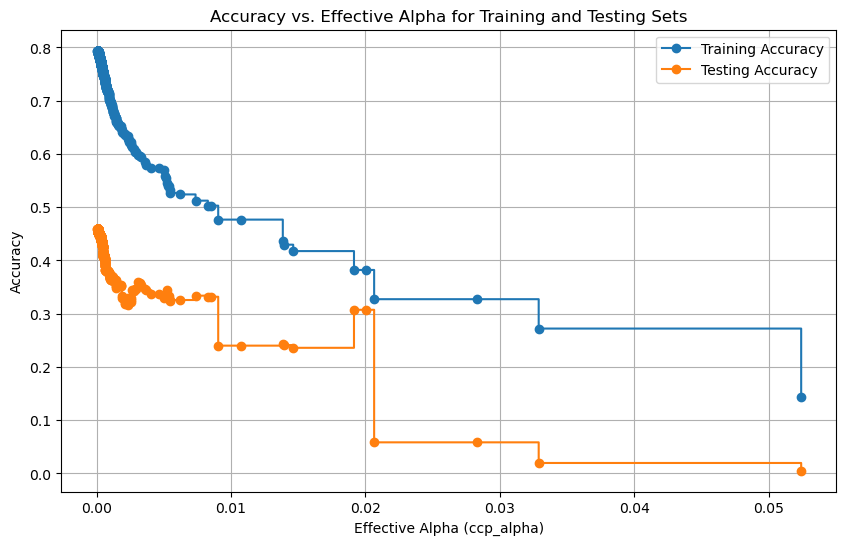

Optimal ccp_alpha: 0.0
Pruned Tree Accuracy: 0.45816326530612245


c:\Users\Thind\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Thind\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Thind\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Pruned Tree Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.07      0.20      0.10        25
           5       0.54      0.49      0.52       291
           6       0.57      0.48      0.52       432
           7       0.43      0.40      0.42       192
           8       0.17      0.43      0.25        35
           9       0.00      0.00      0.00         0

    accuracy                           0.46       980
   macro avg       0.26      0.29      0.26       980
weighted avg       0.51      0.46      0.48       980



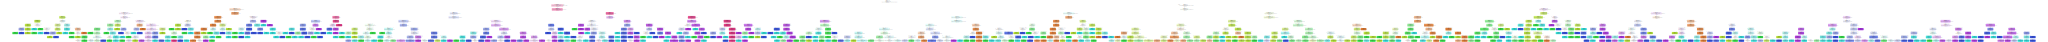

In [32]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import graphviz
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# We call the csv data
df = pd.read_csv('../data/raw/winequalityN.csv')
# We fill the NaN numerical values with 0
df.fillna(df.select_dtypes(include='number').mean(), inplace=True)

# White wine
dfW = df[df['type'] == 'white'].drop('type',axis =1)


top_Features = ['alcohol', 'volatile acidity', 'free sulfur dioxide','citric acid']
# Y is our target
y = dfW['quality']
X_drop = dfW.drop('quality', axis=1)

X_reduced = X_drop[top_Features]

smote = SMOTE(random_state=42, k_neighbors=3)

# We split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_drop, y, test_size=0.2, random_state=42)

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)



#grab the path total leaf impurities and then grab the alphas
path = DecisionTreeClassifier(random_state=42).cost_complexity_pruning_path(X_train_res, y_train_res)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clf_list = []


for ccp_alpha in ccp_alphas:
    Decision = DecisionTreeClassifier(max_depth=10,min_samples_leaf=1,min_samples_split=2 ,ccp_alpha = ccp_alpha, random_state=42)
    Decision.fit(X_train_res,y_train_res)
    clf_list.append(Decision)
    


train_scores = [clf.score(X_train_res, y_train_res) for clf in clf_list]
test_scores = [clf.score(X_test, y_test) for clf in clf_list]


plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label='Training Accuracy', drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label='Testing Accuracy', drawstyle="steps-post")
plt.xlabel("Effective Alpha (ccp_alpha)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Effective Alpha for Training and Testing Sets")
plt.legend()
plt.grid(True)
plt.show()

optimal_index = test_scores.index(max(test_scores))
optimal_alpha = ccp_alphas[optimal_index]
print(f"Optimal ccp_alpha: {optimal_alpha}")


pruned_tree = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    ccp_alpha=optimal_alpha,
    random_state=42
)
pruned_tree.fit(X_train_res, y_train_res)

y_pred_pruned = pruned_tree.predict(X_test)

# Accuracy
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
print("Pruned Tree Accuracy:", accuracy_pruned)

# Classification Report
print("\nPruned Tree Classification Report:\n", classification_report(y_test, y_pred_pruned))


data_graph = tree.export_graphviz(
    pruned_tree, 
    out_file=None, 
    feature_names=X_drop.columns,  
    class_names=[str(i) for i in sorted(y.unique())],  
    filled=True, 
    rounded=True,  
    special_characters=True,
    precision=2  
)

# Generate the Graphviz visualization
graph = graphviz.Source(data_graph)
graph